In [1]:
from pyspark.sql import SparkSession 
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DateType, FloatType, BooleanType
from pyspark.sql.functions import *

In [2]:
## pip install matplotlib seaborn pandas

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
spark = SparkSession.builder.appName("ipl data analysis").getOrCreate()

In [5]:
spark

In [6]:
 deliveries_schema = StructType([
    StructField("match_id", IntegerType(), True),
    StructField("inning", IntegerType(), True),
    StructField("batting_team", StringType(), True),
    StructField("bowling_team", StringType(), True),
    StructField("over", IntegerType(), True),
    StructField("ball", IntegerType(), True),
    StructField("batter", StringType(), True),
    StructField("bowler", StringType(), True),
    StructField("non_striker", StringType(), True),
    StructField("batsman_runs", IntegerType(), True),
    StructField("extra_runs", IntegerType(), True),
    StructField("total_runs", IntegerType(), True),
    StructField("extras_type", StringType(), True),
    StructField("is_wicket", IntegerType(), True),
    StructField("player_dismissed", StringType(), True),
    StructField("dismissal_kind", StringType(), True),
    StructField("fielder", StringType(), True)
]) 

In [7]:
deliveries_df = spark.read.csv("./IPL data/deliveries.csv" , header = True , inferSchema=True)

deliveries_df.show()

+--------+------+--------------------+--------------------+----+----+-----------+---------+-----------+------------+----------+----------+-----------+---------+----------------+--------------+-------+
|match_id|inning|        batting_team|        bowling_team|over|ball|     batter|   bowler|non_striker|batsman_runs|extra_runs|total_runs|extras_type|is_wicket|player_dismissed|dismissal_kind|fielder|
+--------+------+--------------------+--------------------+----+----+-----------+---------+-----------+------------+----------+----------+-----------+---------+----------------+--------------+-------+
|  335982|     1|Kolkata Knight Ri...|Royal Challengers...|   0|   1| SC Ganguly|  P Kumar|BB McCullum|           0|         1|         1|    legbyes|        0|              NA|            NA|     NA|
|  335982|     1|Kolkata Knight Ri...|Royal Challengers...|   0|   2|BB McCullum|  P Kumar| SC Ganguly|           0|         0|         0|       NULL|        0|              NA|            NA|    

In [8]:
deliveries_df.filter(col("is_wicket") == 1).show()

+--------+------+--------------------+--------------------+----+----+----------+----------+-------------+------------+----------+----------+-----------+---------+----------------+--------------+---------------+
|match_id|inning|        batting_team|        bowling_team|over|ball|    batter|    bowler|  non_striker|batsman_runs|extra_runs|total_runs|extras_type|is_wicket|player_dismissed|dismissal_kind|        fielder|
+--------+------+--------------------+--------------------+----+----+----------+----------+-------------+------------+----------+----------+-----------+---------+----------------+--------------+---------------+
|  335982|     1|Kolkata Knight Ri...|Royal Challengers...|   5|   2|SC Ganguly|    Z Khan|  BB McCullum|           0|         0|         0|       NULL|        1|      SC Ganguly|        caught|      JH Kallis|
|  335982|     1|Kolkata Knight Ri...|Royal Challengers...|  12|   1|RT Ponting| JH Kallis|  BB McCullum|           0|         0|         0|       NULL|    

In [9]:
deliveries_df.printSchema()

root
 |-- match_id: integer (nullable = true)
 |-- inning: integer (nullable = true)
 |-- batting_team: string (nullable = true)
 |-- bowling_team: string (nullable = true)
 |-- over: integer (nullable = true)
 |-- ball: integer (nullable = true)
 |-- batter: string (nullable = true)
 |-- bowler: string (nullable = true)
 |-- non_striker: string (nullable = true)
 |-- batsman_runs: integer (nullable = true)
 |-- extra_runs: integer (nullable = true)
 |-- total_runs: integer (nullable = true)
 |-- extras_type: string (nullable = true)
 |-- is_wicket: integer (nullable = true)
 |-- player_dismissed: string (nullable = true)
 |-- dismissal_kind: string (nullable = true)
 |-- fielder: string (nullable = true)



In [10]:
deliveries_df.printSchema()

root
 |-- match_id: integer (nullable = true)
 |-- inning: integer (nullable = true)
 |-- batting_team: string (nullable = true)
 |-- bowling_team: string (nullable = true)
 |-- over: integer (nullable = true)
 |-- ball: integer (nullable = true)
 |-- batter: string (nullable = true)
 |-- bowler: string (nullable = true)
 |-- non_striker: string (nullable = true)
 |-- batsman_runs: integer (nullable = true)
 |-- extra_runs: integer (nullable = true)
 |-- total_runs: integer (nullable = true)
 |-- extras_type: string (nullable = true)
 |-- is_wicket: integer (nullable = true)
 |-- player_dismissed: string (nullable = true)
 |-- dismissal_kind: string (nullable = true)
 |-- fielder: string (nullable = true)



In [11]:
df = spark.read.csv("./IPL data/deliveries.csv" , header = True , schema = deliveries_schema ) 

In [12]:
df.createOrReplaceTempView("IPL_DATA")

In [13]:
query = f"""
SELECT COUNT(*) AS boundaries 
FROM IPL_DATA 
WHERE batting_team = 'Chennai Super Kings' AND bowling_team = 'Mumbai Indians' AND batsman_runs >= 4  
"""
df_2 = spark.sql(query)

In [14]:
df_2.show()

+----------+
|boundaries|
+----------+
|       701|
+----------+



In [15]:
matches_df = spark.read.csv("./IPL data/matches.csv", header=True , inferSchema = True)

In [16]:
matches_df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- season: string (nullable = true)
 |-- city: string (nullable = true)
 |-- date: date (nullable = true)
 |-- match_type: string (nullable = true)
 |-- player_of_match: string (nullable = true)
 |-- venue: string (nullable = true)
 |-- team1: string (nullable = true)
 |-- team2: string (nullable = true)
 |-- toss_winner: string (nullable = true)
 |-- toss_decision: string (nullable = true)
 |-- winner: string (nullable = true)
 |-- result: string (nullable = true)
 |-- result_margin: string (nullable = true)
 |-- target_runs: string (nullable = true)
 |-- target_overs: string (nullable = true)
 |-- super_over: string (nullable = true)
 |-- method: string (nullable = true)
 |-- umpire1: string (nullable = true)
 |-- umpire2: string (nullable = true)



In [17]:
matches_schema = StructType([
    StructField("id", IntegerType(), True),
    StructField("season", IntegerType(), True),
    StructField("city", StringType(), True),
    StructField("date", DateType(), True),
    StructField("match_type", StringType(), True),
    StructField("player_of_match", StringType(), True),
    StructField("venue", StringType(), True),
    StructField("team1", StringType(), True),
    StructField("team2", StringType(), True),
    StructField("toss_winner", StringType(), True),
    StructField("toss_decision", StringType(), True),
    StructField("winner", StringType(), True),
    StructField("result", StringType(), True),
    StructField("result_margin", IntegerType(), True),
    StructField("target_runs", IntegerType(), True),
    StructField("super_over", StringType(), True),
    StructField("method", StringType(), True),
    StructField("umpire1", StringType(), True),
    StructField("umpire2", StringType(), True)
])

In [18]:
matches_df = spark.read.csv("./IPL data/matches.csv", header=True , schema = matches_schema)

In [19]:
replacements = {
    "Royal Challengers Bengaluru" : "Royal Challengers Bangalore",
    "Delhi Daredevils" : "Delhi Capitals",
    "Kings XI Punjab" : "Punjab Kings",
    "Gujarat Lions" : "Gujarat Titans",
    "Pune Warriors" : "Rising Pune Supergiant",
    "Rising Pune Supergiant" :"Rising Pune Supergiants"
}

matches_df = matches_df.replace(replacements,['team1','team2','toss_winner','winner']).cache()


c:\Users\adarsh\miniconda3\Lib\site-packages\pyspark\sql\dataframe.py:4673: UserWarning: to_replace is a dict and value is not None. value will be ignored.
  warnings.warn("to_replace is a dict and value is not None. value will be ignored.")


In [20]:
matches_df.show()

+------+------+----------+----------+----------+---------------+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+-----------+----------+------+-------+-----------+
|    id|season|      city|      date|match_type|player_of_match|               venue|               team1|               team2|         toss_winner|toss_decision|              winner| result|result_margin|target_runs|super_over|method|umpire1|    umpire2|
+------+------+----------+----------+----------+---------------+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+-----------+----------+------+-------+-----------+
|335982|  NULL| Bangalore|2008-04-18|    League|    BB McCullum|M Chinnaswamy Sta...|Royal Challengers...|Kolkata Knight Ri...|Royal Challengers...|        field|Kolkata Knight Ri...|   runs|          140|        223|        20|    

In [21]:
deliveries_df = deliveries_df.fillna({
    'player_dismissed': 'None',
    'dismissal_kind': 'Not Out',
    'batsman_runs': 0,
    'extra_runs': 0,
    'is_wicket': 0
})

In [22]:
deliveries_df = deliveries_df.dropna(subset=['match_id', 'batting_team', 'bowling_team'])

In [23]:
deliveries_df.show()

+--------+------+--------------------+--------------------+----+----+-----------+---------+-----------+------------+----------+----------+-----------+---------+----------------+--------------+-------+
|match_id|inning|        batting_team|        bowling_team|over|ball|     batter|   bowler|non_striker|batsman_runs|extra_runs|total_runs|extras_type|is_wicket|player_dismissed|dismissal_kind|fielder|
+--------+------+--------------------+--------------------+----+----+-----------+---------+-----------+------------+----------+----------+-----------+---------+----------------+--------------+-------+
|  335982|     1|Kolkata Knight Ri...|Royal Challengers...|   0|   1| SC Ganguly|  P Kumar|BB McCullum|           0|         1|         1|    legbyes|        0|              NA|            NA|     NA|
|  335982|     1|Kolkata Knight Ri...|Royal Challengers...|   0|   2|BB McCullum|  P Kumar| SC Ganguly|           0|         0|         0|       NULL|        0|              NA|            NA|    

In [24]:
matches_df.show()

+------+------+----------+----------+----------+---------------+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+-----------+----------+------+-------+-----------+
|    id|season|      city|      date|match_type|player_of_match|               venue|               team1|               team2|         toss_winner|toss_decision|              winner| result|result_margin|target_runs|super_over|method|umpire1|    umpire2|
+------+------+----------+----------+----------+---------------+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+-----------+----------+------+-------+-----------+
|335982|  NULL| Bangalore|2008-04-18|    League|    BB McCullum|M Chinnaswamy Sta...|Royal Challengers...|Kolkata Knight Ri...|Royal Challengers...|        field|Kolkata Knight Ri...|   runs|          140|        223|        20|    

In [25]:
matches_df = matches_df.dropna(subset=['id', 'team1', 'team2', 'winner'])

In [26]:
## 1). Top Run Scorers Across seasons

In [27]:
# Check some entries from both DataFrames
deliveries_df.select("match_id").distinct().show(10)
matches_df.select("id").distinct().show(10)


+--------+
|match_id|
+--------+
|  419157|
|  392222|
|  419142|
|  392218|
|  336036|
|  419138|
|  419161|
|  336017|
|  335992|
|  392227|
+--------+
only showing top 10 rows

+-------+
|     id|
+-------+
| 501247|
| 501269|
| 829705|
| 980905|
|1254081|
| 598045|
|1082608|
|1304099|
|1426311|
| 501201|
+-------+
only showing top 10 rows



Top Run Scorers Across All Seasons

In [28]:
deliveries_with_season_df = deliveries_df.join(matches_df, deliveries_df.match_id == matches_df.id, "left") \
    .select(
        deliveries_df["*"],
        matches_df["season"]
    )


In [29]:
top_run_scorers_seasons = (deliveries_with_season_df.groupBy("season","batter")
  .sum("batsman_runs")
  .withColumnRenamed("sum(batsman_runs)","total_runs")
  .orderBy(col("total_runs").desc()) ).filter(col("season").isNotNull())
 

In [30]:
top_run_scorers_seasons.show()

+------+--------------+----------+
|season|        batter|total_runs|
+------+--------------+----------+
|  2016|       V Kohli|       973|
|  2023|  Shubman Gill|       890|
|  2022|    JC Buttler|       863|
|  2016|     DA Warner|       848|
|  2024|       V Kohli|       741|
|  2018| KS Williamson|       735|
|  2012|      CH Gayle|       733|
|  2013|    MEK Hussey|       733|
|  2023|  F du Plessis|       730|
|  2013|      CH Gayle|       720|
|  2019|     DA Warner|       692|
|  2016|AB de Villiers|       687|
|  2018|       RR Pant|       684|
|  2023|     DP Conway|       672|
|  2014|    RV Uthappa|       660|
|  2018|      KL Rahul|       659|
|  2017|     DA Warner|       641|
|  2013|       V Kohli|       639|
|  2023|       V Kohli|       639|
|  2021|    RD Gaikwad|       635|
+------+--------------+----------+
only showing top 20 rows



In [31]:
top_run_scorers_pandas_df = top_run_scorers_seasons.toPandas()

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\adarsh\AppData\Local\Temp\ipykernel_29216\3818636200.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_scorers, x='batter', y='total_runs', palette='viridis')


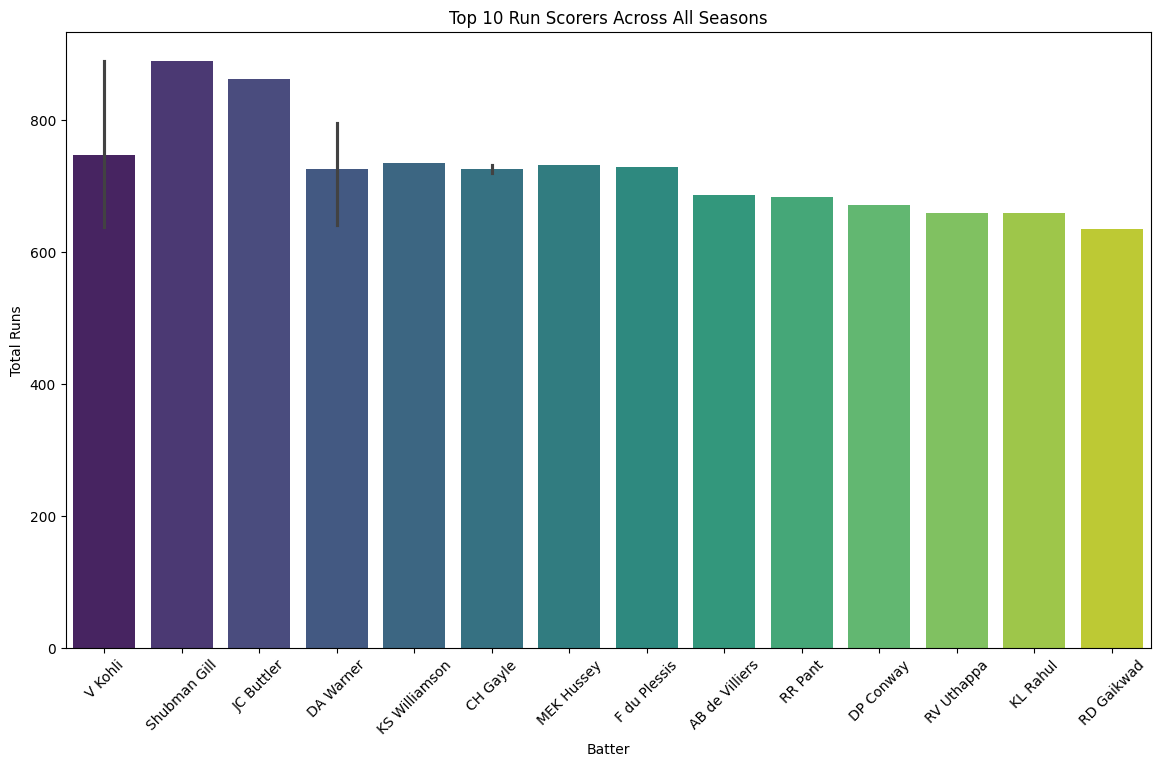

In [33]:
# Plot top run scorers across all seasons
# Plot runs scored by each batter across different seasons
plt.figure(figsize=(14, 8))
top_10_scorers = top_run_scorers_pandas_df.head(20)
sns.barplot(data=top_10_scorers, x='batter', y='total_runs', palette='viridis')
plt.title('Top 10 Run Scorers Across All Seasons')
plt.xlabel('Batter')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.show()




Top Wicket takers by season

In [34]:

deliveries_with_season_df = deliveries_with_season_df.filter(col("season").isNotNull())


In [35]:
top_wicket_takers_season = (deliveries_with_season_df.filter(col("is_wicket") == 1 )
    .groupBy("season","bowler")
    .count()
    .withColumnRenamed("count", "top_wickets")
    .orderBy(col("top_wickets").desc())
                            ) 

top_wicket_takers_season.show(10)
                        
                        

+------+-----------+-----------+
|season|     bowler|top_wickets|
+------+-----------+-----------+
|  2021|   HV Patel|         35|
|  2013|   DJ Bravo|         34|
|  2013|JP Faulkner|         33|
|  2023|  MM Sharma|         31|
|  2011| SL Malinga|         30|
|  2012|   M Morkel|         30|
|  2024|   HV Patel|         30|
|  2012|  SP Narine|         29|
|  2022|  YS Chahal|         29|
|  2019|   K Rabada|         29|
+------+-----------+-----------+
only showing top 10 rows



In [36]:
top_wicket_takers_season_pandas = top_wicket_takers_season.toPandas()

In [37]:
print(top_wicket_takers_season_pandas.head(10))


   season       bowler  top_wickets
0    2021     HV Patel           35
1    2013     DJ Bravo           34
2    2013  JP Faulkner           33
3    2023    MM Sharma           31
4    2011   SL Malinga           30
5    2012     M Morkel           30
6    2024     HV Patel           30
7    2012    SP Narine           29
8    2019     K Rabada           29
9    2022    YS Chahal           29


C:\Users\adarsh\AppData\Local\Temp\ipykernel_29216\3536111244.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="bowler", y="top_wickets", data=top_10_wickets ,  palette="viridis")


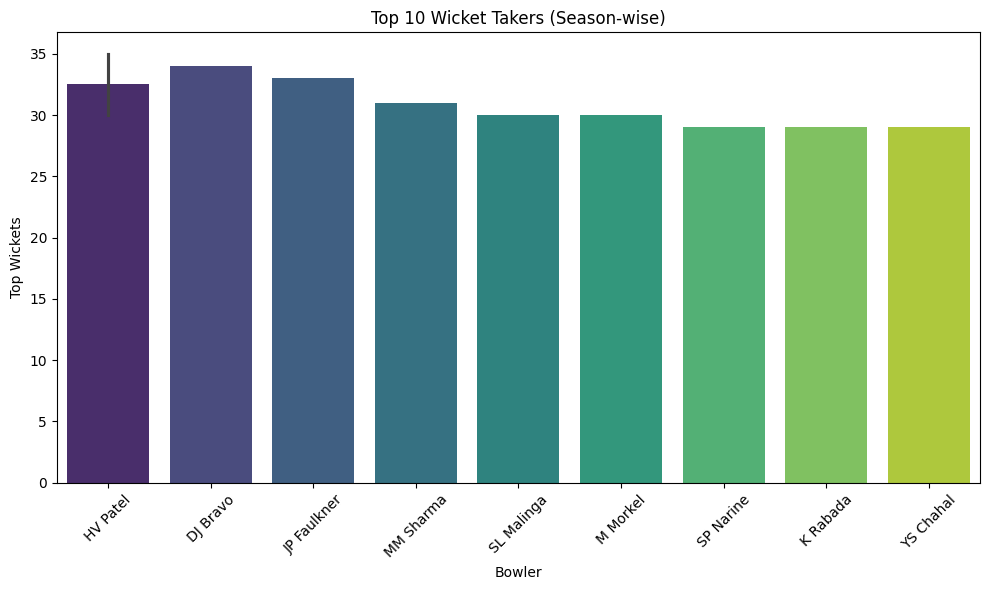

In [38]:
top_10_wickets = top_wicket_takers_season_pandas.head(10)
plt.figure(figsize=(10, 6))  # Adjust figure size for readability
sns.barplot(x="bowler", y="top_wickets", data=top_10_wickets ,  palette="viridis")
plt.xlabel("Bowler")
plt.ylabel("Top Wickets")
plt.title("Top 10 Wicket Takers (Season-wise)")
plt.xticks(rotation=45)  # Rotate bowler names for better readability
plt.tight_layout()
plt.show()


top performance over time


In [39]:
match_df = matches_df.filter(col("season").isNotNull())
team_performance = (match_df.groupBy("season","winner")
    .count()
    .withColumnRenamed("count","total_wins")
    .orderBy(col("season"),col("total_wins").desc())
    ).filter(col("winner") !="NA")

team_performance.show()

+------+--------------------+----------+
|season|              winner|total_wins|
+------+--------------------+----------+
|  2009|      Delhi Capitals|        10|
|  2009|Royal Challengers...|         9|
|  2009|     Deccan Chargers|         9|
|  2009| Chennai Super Kings|         8|
|  2009|        Punjab Kings|         7|
|  2009|    Rajasthan Royals|         6|
|  2009|      Mumbai Indians|         5|
|  2009|Kolkata Knight Ri...|         3|
|  2011| Chennai Super Kings|        11|
|  2011|      Mumbai Indians|        10|
|  2011|Royal Challengers...|        10|
|  2011|Kolkata Knight Ri...|         8|
|  2011|        Punjab Kings|         7|
|  2011|     Deccan Chargers|         6|
|  2011|    Rajasthan Royals|         6|
|  2011|Kochi Tuskers Kerala|         6|
|  2011|      Delhi Capitals|         4|
|  2011|Rising Pune Super...|         4|
|  2012|Kolkata Knight Ri...|        12|
|  2012|      Delhi Capitals|        11|
+------+--------------------+----------+
only showing top

In [40]:
replacements = {
    "Rising Pune Supergiant": "Rising Pune Supergiants",
}
team_performance = team_performance.replace(replacements,['team1','team2','toss_winner','winner']).cache()





c:\Users\adarsh\miniconda3\Lib\site-packages\pyspark\sql\dataframe.py:4673: UserWarning: to_replace is a dict and value is not None. value will be ignored.
  warnings.warn("to_replace is a dict and value is not None. value will be ignored.")


In [41]:
team_performance_pandas = team_performance.toPandas()


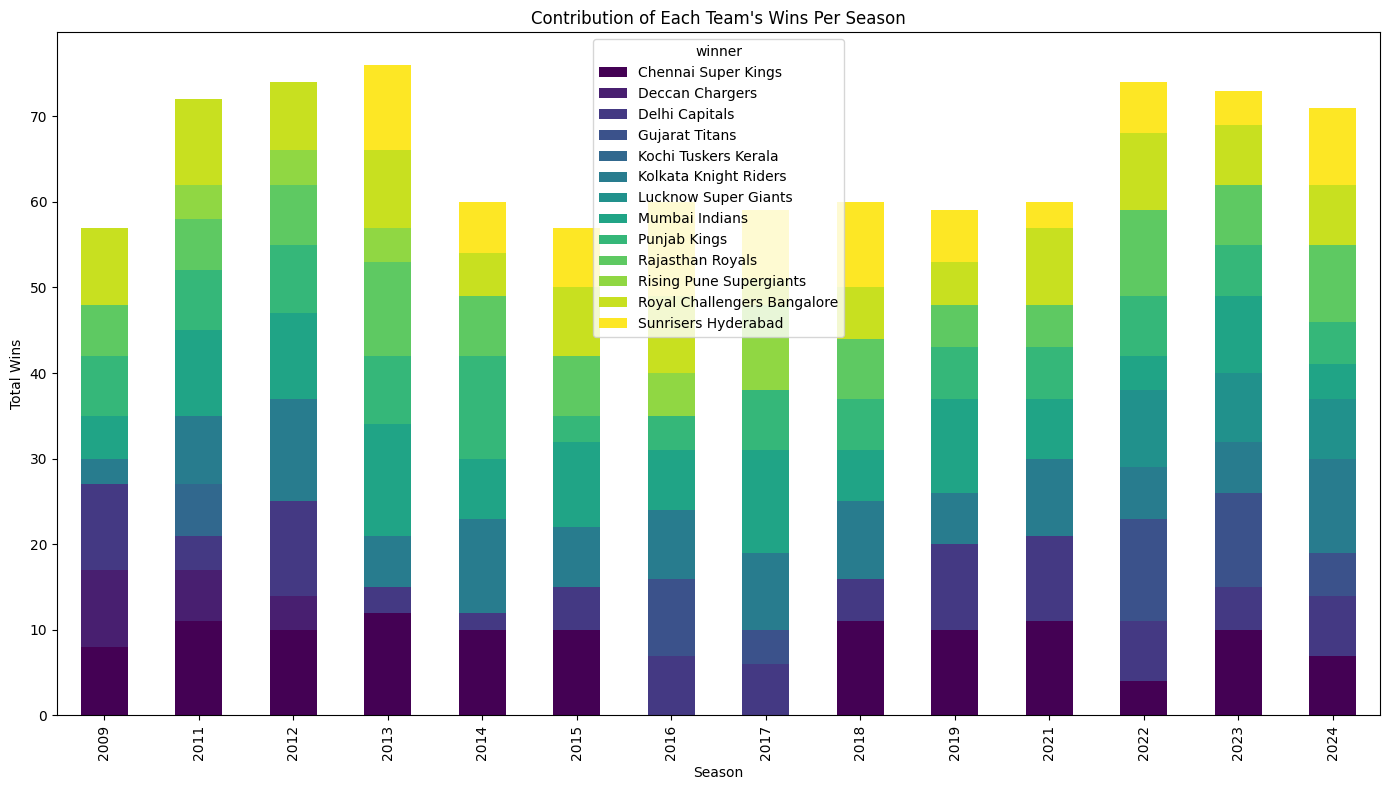

In [42]:
# Create a stacked bar plot
team_performance_time_pandas_pivot = team_performance_pandas.pivot(index='season', columns='winner', values='total_wins')
team_performance_time_pandas_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

plt.xlabel('Season')
plt.ylabel('Total Wins')
plt.title('Contribution of Each Team\'s Wins Per Season')

plt.tight_layout()
plt.show()


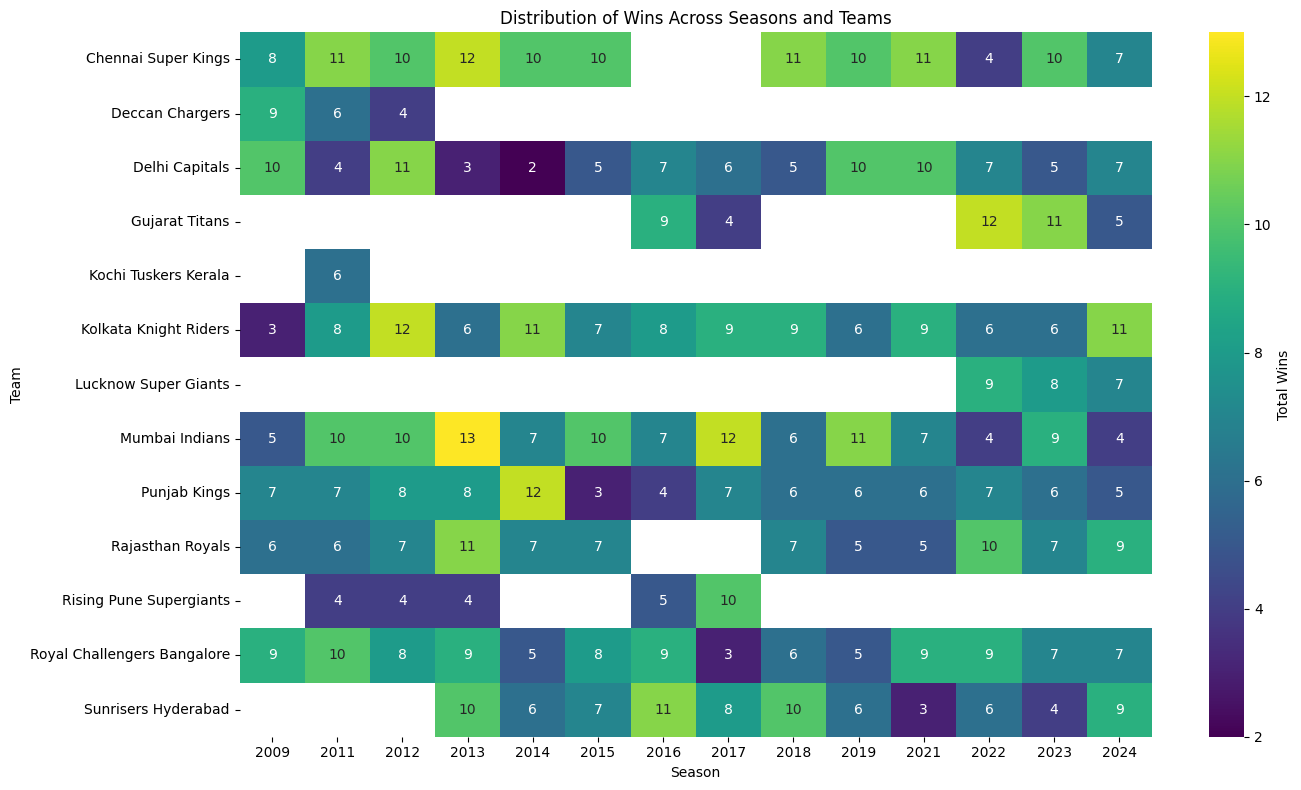

In [43]:
# Pivot the DataFrame to create a matrix for the heatmap
team_performance_matrix = team_performance_pandas.pivot(index='winner', columns='season', values='total_wins')

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(team_performance_matrix, annot=True, fmt='g', cmap='viridis', cbar_kws={'label': 'Total Wins'})

plt.xlabel('Season')
plt.ylabel('Team')
plt.title('Distribution of Wins Across Seasons and Teams')

plt.tight_layout()
plt.show()


Team Win Rate Analysis

In [44]:
total_matches = matches_df.groupBy("team1").count().union(matches_df.groupBy("team2").count()) \
    .groupBy("team1").sum("count").withColumnRenamed("sum(count)", "total_matches")

team_wins = matches_df.groupBy("winner").count().withColumnRenamed("count", "total_wins")

win_rate = team_wins.join(total_matches, team_wins.winner == total_matches.team1) \
    .withColumn("win_rate", round((col("total_wins") / col("total_matches")) * 100,2)) \
    .select("winner", "total_wins", "total_matches", "win_rate")
win_rate.show()


+--------------------+----------+-------------+--------+
|              winner|total_wins|total_matches|win_rate|
+--------------------+----------+-------------+--------+
| Sunrisers Hyderabad|        88|          182|   48.35|
|Lucknow Super Giants|        24|           44|   54.55|
| Chennai Super Kings|       138|          238|   57.98|
|      Gujarat Titans|        41|           75|   54.67|
|Rising Pune Super...|        12|           46|   26.09|
|     Deccan Chargers|        29|           75|   38.67|
|Kochi Tuskers Kerala|         6|           14|   42.86|
|    Rajasthan Royals|       112|          221|   50.68|
|Royal Challengers...|       123|          255|   48.24|
|Kolkata Knight Ri...|       131|          251|   52.19|
|Rising Pune Super...|        15|           30|    50.0|
|        Punjab Kings|       112|          246|   45.53|
|      Delhi Capitals|       115|          252|   45.63|
|      Mumbai Indians|       144|          261|   55.17|
+--------------------+---------

In [45]:
win_rate_pd = win_rate.toPandas()

C:\Users\adarsh\AppData\Local\Temp\ipykernel_29216\2044996423.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='winner', y='total_wins', data=win_rate_pd, palette='viridis')


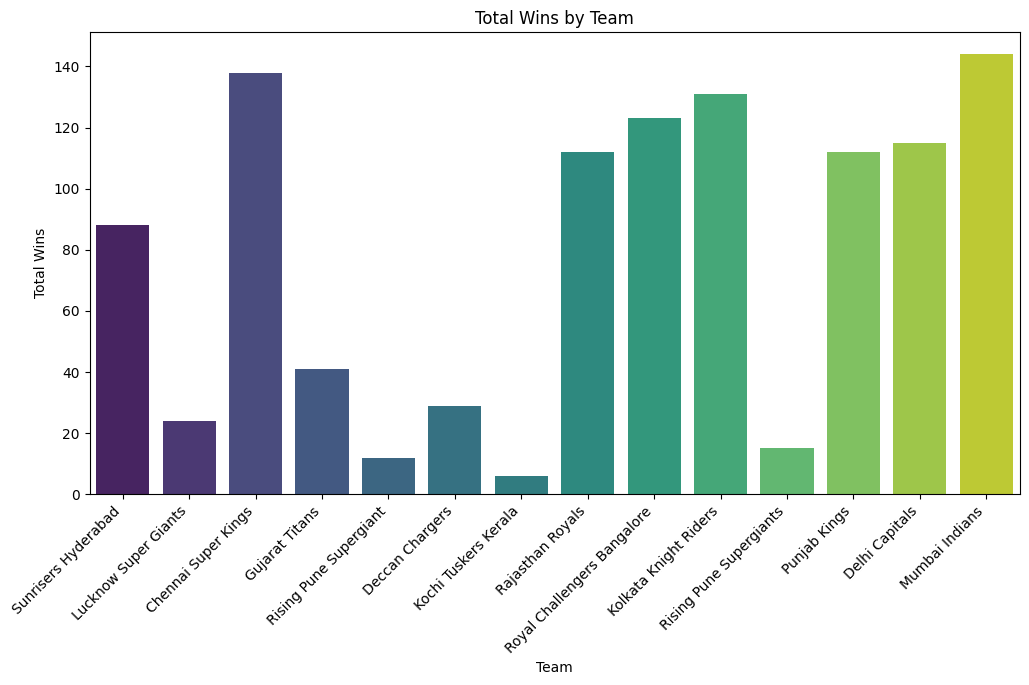

C:\Users\adarsh\AppData\Local\Temp\ipykernel_29216\2044996423.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='winner', y='win_rate', data=win_rate_pd, palette='coolwarm')


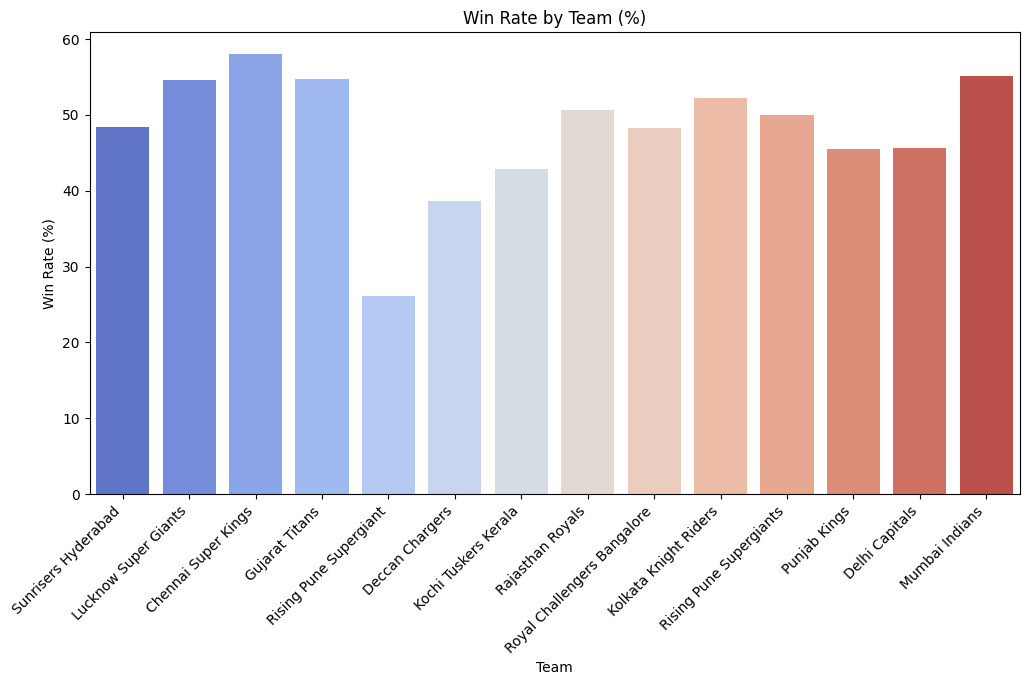

In [46]:
plt.figure(figsize=(12, 6))
sns.barplot(x='winner', y='total_wins', data=win_rate_pd, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Total Wins by Team')
plt.xlabel('Team')
plt.ylabel('Total Wins')
plt.show()

# Bar chart for win rate
plt.figure(figsize=(12, 6))
sns.barplot(x='winner', y='win_rate', data=win_rate_pd, palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Win Rate by Team (%)')
plt.xlabel('Team')
plt.ylabel('Win Rate (%)')
plt.show()

Impact of Toss Decision on Match Outcome

In [47]:
toss_impact = matches_df.groupBy("toss_decision", "winner").count() \
    .withColumnRenamed("count", "wins") \
    .orderBy(col("wins").desc()).filter(col("winner") != "NA")
toss_impact.show()


+-------------+--------------------+----+
|toss_decision|              winner|wins|
+-------------+--------------------+----+
|        field|      Mumbai Indians|  90|
|        field|Royal Challengers...|  85|
|        field|        Punjab Kings|  84|
|        field|Kolkata Knight Ri...|  81|
|        field| Chennai Super Kings|  75|
|        field|      Delhi Capitals|  73|
|        field|    Rajasthan Royals|  69|
|          bat| Chennai Super Kings|  63|
|        field| Sunrisers Hyderabad|  58|
|          bat|      Mumbai Indians|  54|
|          bat|Kolkata Knight Ri...|  50|
|          bat|    Rajasthan Royals|  43|
|          bat|      Delhi Capitals|  42|
|          bat|Royal Challengers...|  38|
|          bat| Sunrisers Hyderabad|  30|
|        field|      Gujarat Titans|  30|
|          bat|        Punjab Kings|  28|
|        field|Lucknow Super Giants|  18|
|        field|     Deccan Chargers|  15|
|          bat|     Deccan Chargers|  14|
+-------------+-------------------

In [48]:
toss_impact_pd = toss_impact.toPandas()
toss_impact_pd.head(30)

,toss_decision,winner,wins
0,field,Mumbai Indians,90
1,field,Royal Challengers Bangalore,85
2,field,Punjab Kings,84
3,field,Kolkata Knight Riders,81
4,field,Chennai Super Kings,75
5,field,Delhi Capitals,73
6,field,Rajasthan Royals,69
7,bat,Chennai Super Kings,63
8,field,Sunrisers Hyderabad,58
9,bat,Mumbai Indians,54


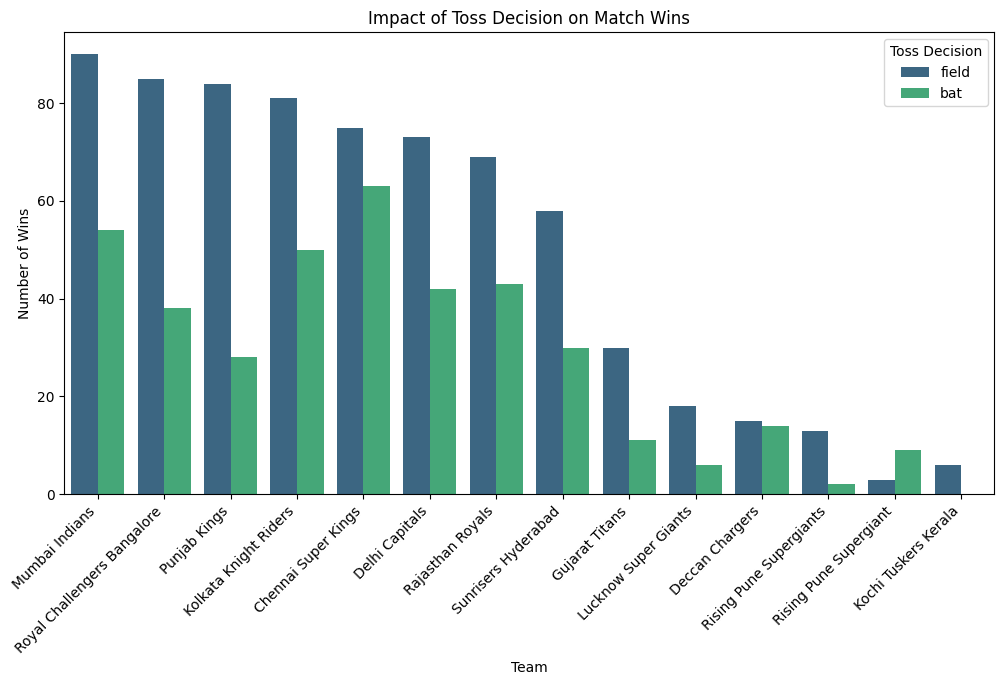

In [49]:
plt.figure(figsize=(12, 6))
sns.barplot(x='winner', y='wins', hue='toss_decision', data=toss_impact_pd, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Impact of Toss Decision on Match Wins')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.legend(title='Toss Decision')
plt.show()

Top 10 Venue Analysis

In [50]:
venue_scores = deliveries_df.join(matches_df, deliveries_df.match_id == matches_df.id) \
    .groupBy("venue").sum("total_runs") \
    .withColumnRenamed("sum(total_runs)", "total_score") \
    .orderBy(col("total_score").desc())
venue_scores.show()

+--------------------+-----------+
|               venue|total_score|
+--------------------+-----------+
|        Eden Gardens|      23658|
|    Wankhede Stadium|      23407|
|M Chinnaswamy Sta...|      20263|
|    Feroz Shah Kotla|      18421|
|Wankhede Stadium,...|      15587|
|MA Chidambaram St...|      15277|
|Rajiv Gandhi Inte...|      14888|
|Dubai Internation...|      14450|
|Sawai Mansingh St...|      14264|
|Punjab Cricket As...|      10987|
|MA Chidambaram St...|       8866|
|Sheikh Zayed Stadium|       8857|
|Sharjah Cricket S...|       8583|
|Narendra Modi Sta...|       8150|
|Maharashtra Crick...|       7007|
|Dr DY Patil Sport...|       6573|
|Arun Jaitley Stad...|       6091|
|Eden Gardens, Kol...|       6085|
|Brabourne Stadium...|       5824|
|M Chinnaswamy Sta...|       5322|
+--------------------+-----------+
only showing top 20 rows



In [51]:
venue_scores_pd = venue_scores.toPandas()

C:\Users\adarsh\AppData\Local\Temp\ipykernel_29216\331170080.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_score', y='venue', data=top_venues_pd, palette='coolwarm')


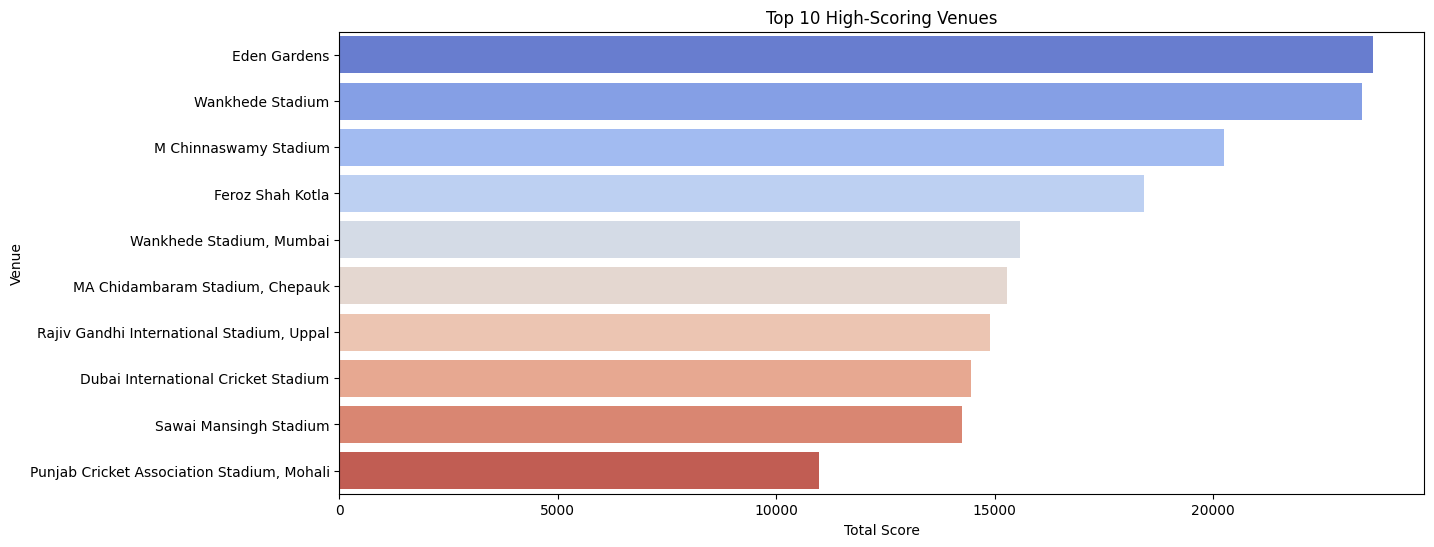

In [52]:
top_venues_pd = venue_scores_pd.head(10)

# Bar chart for the top 10 high-scoring venues
plt.figure(figsize=(14, 6))
sns.barplot(x='total_score', y='venue', data=top_venues_pd, palette='coolwarm')
plt.title('Top 10 High-Scoring Venues')
plt.xlabel('Total Score')
plt.ylabel('Venue')
plt.show()

Man of The Match Analysis

In [53]:
# Assuming you have a 'player_of_the_match' column
man_of_the_match_analysis =( matches_df 
    .groupBy("player_of_match") 
    .count() 
    .withColumnRenamed("count", "matches_won") 
    .orderBy(desc("matches_won"))
)

man_of_the_match_analysis.show()


+---------------+-----------+
|player_of_match|matches_won|
+---------------+-----------+
| AB de Villiers|         25|
|       CH Gayle|         22|
|      RG Sharma|         19|
|      DA Warner|         18|
|        V Kohli|         18|
|       MS Dhoni|         17|
|      YK Pathan|         16|
|      SR Watson|         16|
|      RA Jadeja|         16|
|      SP Narine|         15|
|     AD Russell|         15|
|     KA Pollard|         14|
|       SK Raina|         14|
|      AM Rahane|         13|
|     JC Buttler|         13|
|       KL Rahul|         13|
|      G Gambhir|         13|
|       S Dhawan|         12|
|    Rashid Khan|         12|
|       A Mishra|         12|
+---------------+-----------+
only showing top 20 rows



In [54]:
pdf = man_of_the_match_analysis.toPandas()
pdf.head()

,player_of_match,matches_won
0,AB de Villiers,25
1,CH Gayle,22
2,RG Sharma,19
3,DA Warner,18
4,V Kohli,18


C:\Users\adarsh\AppData\Local\Temp\ipykernel_29216\3765111355.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='matches_won', y='player_of_match', data=pdf, palette='Blues_d')


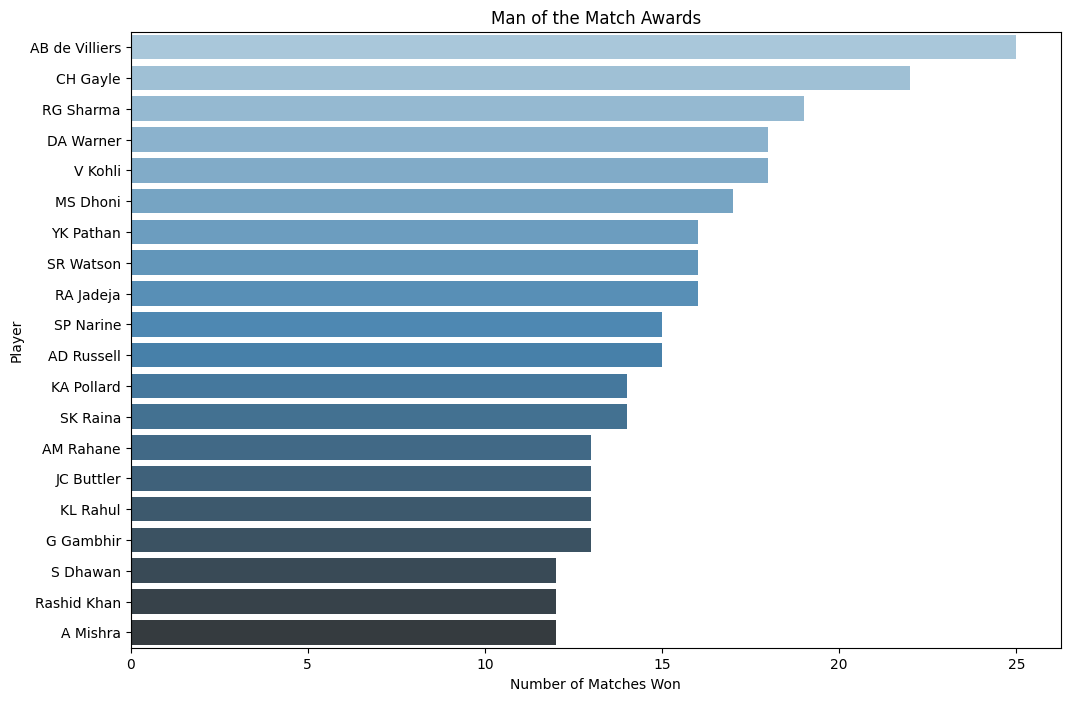

In [57]:
pdf = pdf.head(20)
plt.figure(figsize=(12, 8))
sns.barplot(x='matches_won', y='player_of_match', data=pdf, palette='Blues_d')
plt.xlabel('Number of Matches Won')
plt.ylabel('Player')
plt.title('Man of the Match Awards')
plt.show()

In [60]:
# Analyze the types of dismissals
dismissal_analysis = deliveries_df \
    .filter(col("is_wicket") == 1) \
    .groupBy("dismissal_kind") \
    .count() \
    .withColumnRenamed("count", "frequency") \
    .orderBy(desc("frequency"))

dismissal_analysis.show()


+--------------------+---------+
|      dismissal_kind|frequency|
+--------------------+---------+
|              caught|     8063|
|              bowled|     2212|
|             run out|     1114|
|                 lbw|      800|
|   caught and bowled|      367|
|             stumped|      358|
|          hit wicket|       15|
|        retired hurt|       15|
|obstructing the f...|        3|
|         retired out|        3|
+--------------------+---------+



In [95]:
dismissal_analysis_pandas = dismissal_analysis.toPandas()

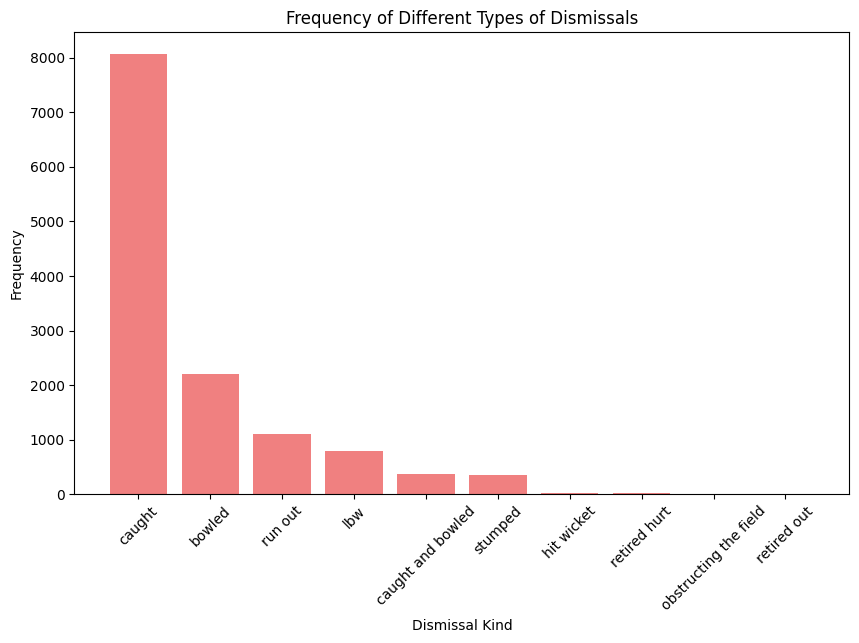

In [97]:
plt.figure(figsize=(10, 6))
plt.bar(dismissal_analysis_pandas['dismissal_kind'], dismissal_analysis_pandas['frequency'], color='lightcoral')
plt.xlabel('Dismissal Kind')
plt.ylabel('Frequency')
plt.title('Frequency of Different Types of Dismissals')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

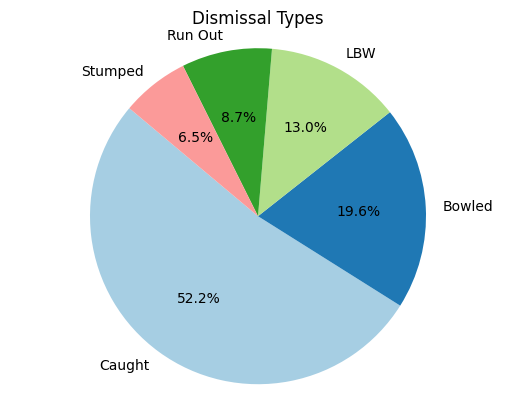

In [63]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data for demonstration
data = {
    'dismissal_kind': ['Caught', 'Bowled', 'LBW', 'Run Out', 'Stumped'],
    'frequency': [120, 45, 30, 20, 15]
}

# Convert to Pandas DataFrame
df = pd.DataFrame(data)

# Data for pie chart
labels = df['dismissal_kind']
sizes = df['frequency']

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(labels))))

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  

# Add a title
plt.title('Dismissal Types')

# Show the plot
plt.show()
